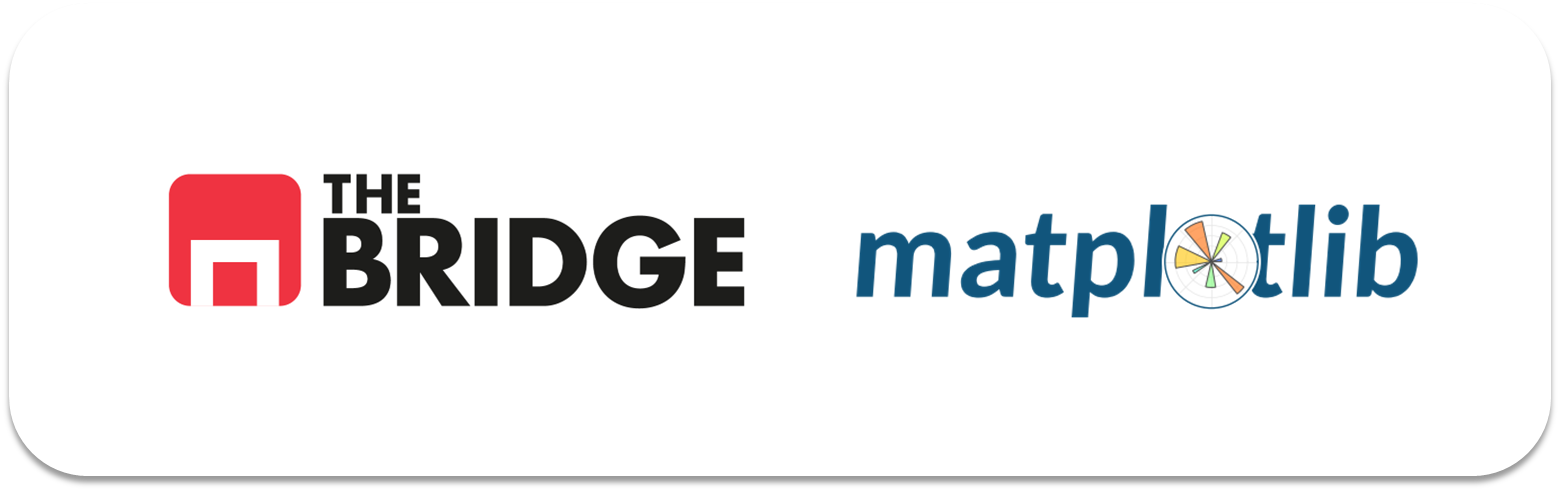

## PRACTICA OBLIGATORIA: VISUALIZACION BASICA

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## #1

### #1.1

Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv". Muestra parte de su contenido y su descripción. Deshazte de las filas con nulos.

In [3]:
#Cargo el contenido del dataset en un dataframe y muestro su contenido
df = pd.read_csv("./data/california_cities.csv")
df.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


In [4]:
#La descripción del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          482 non-null    int64  
 1   city                482 non-null    object 
 2   latd                482 non-null    float64
 3   longd               482 non-null    float64
 4   elevation_m         434 non-null    float64
 5   elevation_ft        470 non-null    float64
 6   population_total    482 non-null    int64  
 7   area_total_sq_mi    480 non-null    float64
 8   area_land_sq_mi     482 non-null    float64
 9   area_water_sq_mi    481 non-null    float64
 10  area_total_km2      477 non-null    float64
 11  area_land_km2       478 non-null    float64
 12  area_water_km2      478 non-null    float64
 13  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 52.8+ KB


In [5]:
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 0 to 481
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          427 non-null    int64  
 1   city                427 non-null    object 
 2   latd                427 non-null    float64
 3   longd               427 non-null    float64
 4   elevation_m         427 non-null    float64
 5   elevation_ft        427 non-null    float64
 6   population_total    427 non-null    int64  
 7   area_total_sq_mi    427 non-null    float64
 8   area_land_sq_mi     427 non-null    float64
 9   area_water_sq_mi    427 non-null    float64
 10  area_total_km2      427 non-null    float64
 11  area_land_km2       427 non-null    float64
 12  area_water_km2      427 non-null    float64
 13  area_water_percent  427 non-null    float64
dtypes: float64(11), int64(2), object(1)
memory usage: 50.0+ KB


### #1.2

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro. Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, marrón, con trasparencia)
2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)
3. El scatter de área de agua de un ciudad con su poblacion.
4. El boxplot de la altura de las ciudades.

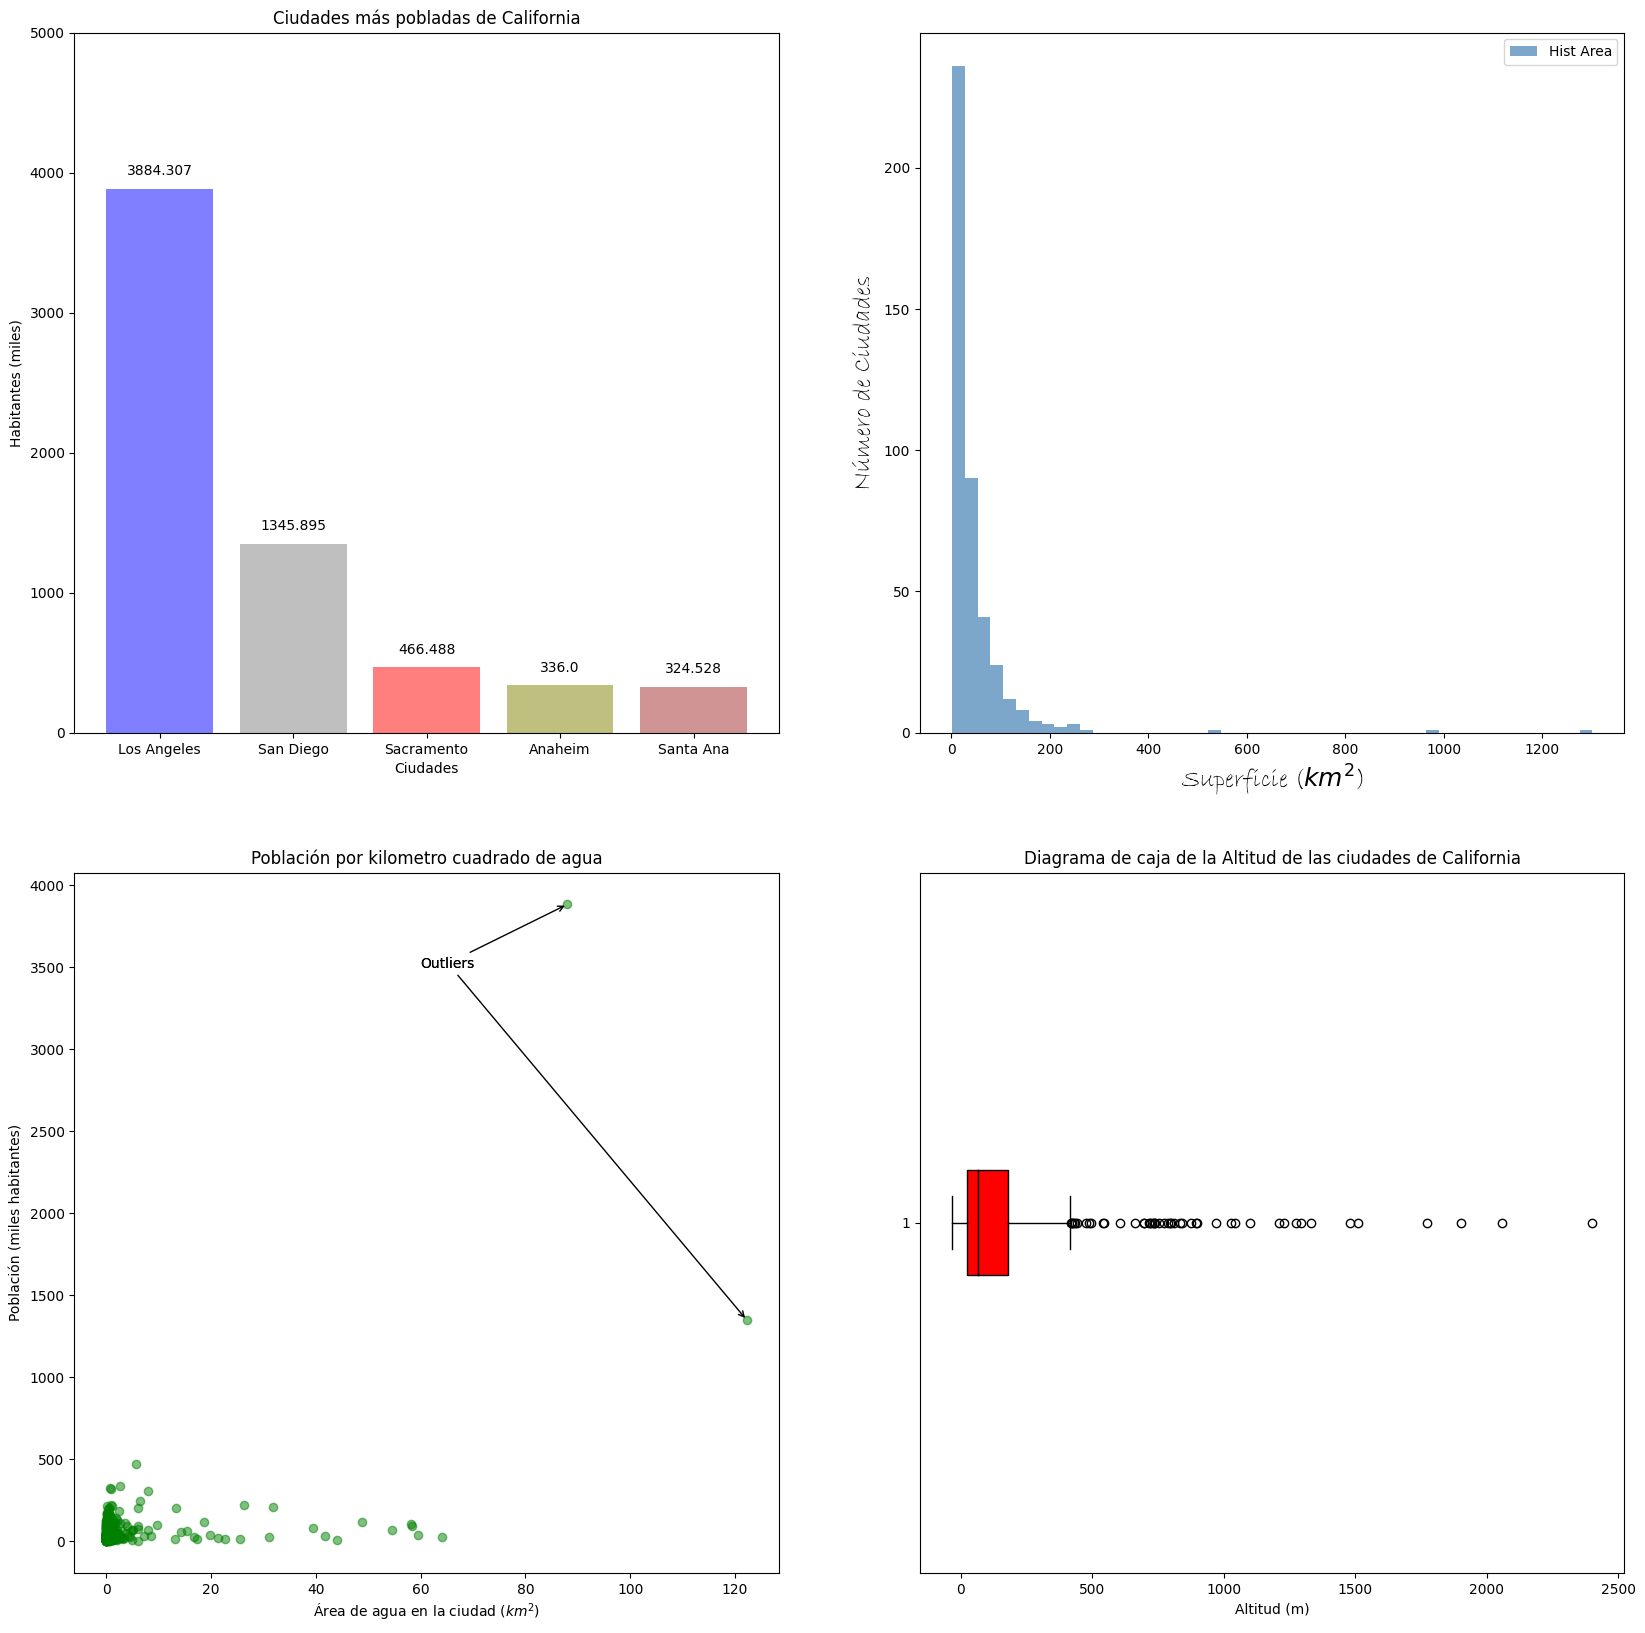


# 1. 
Las ciudades más pobladas, con los numeros de las poblaciones 
(tendrás que usar texto y recordar que para centrarlos se necesita 
poner el argumento `ha` a "center"). (Colores: azul, gris, aceituna, 
marrón, con trasparencia)




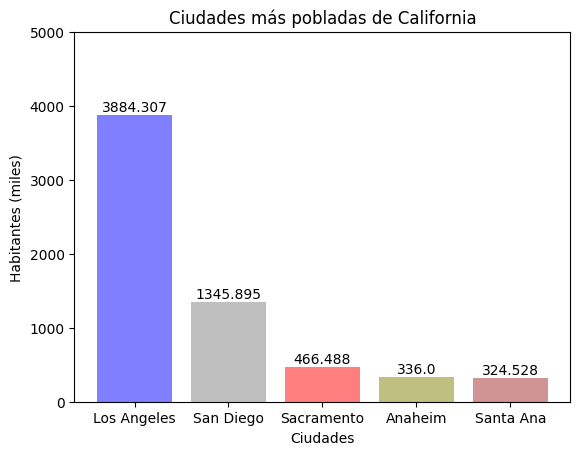

In [7]:
city_pobladas = df.loc[df.population_total.nlargest(5).index, ["city","population_total"]]

modificadas = {"LosAngeles": "Los Angeles", "SanDiego": "San Diego", "SantaAna": "Santa Ana"}
ciudades = city_pobladas["city"].replace (modificadas).to_list()

plt.bar(x= ciudades, height= city_pobladas["population_total"]/1000, color = ("blue","gray","red","olive","brown"), alpha = 0.5)
plt.ylim([0,5000])
plt.ylabel("Habitantes (miles)")
plt.xlabel("Ciudades")


city_pobladas.set_index("city", inplace = True)
for indice, ciudad in enumerate(city_pobladas.index):
    poblacion = city_pobladas.loc[ciudad,"population_total"]/1000
    plt.text(ciudades[indice], poblacion + 50, f"{poblacion}", ha = "center")
    
plt.title("Ciudades más pobladas de California")
plt.show()

# 2. 
Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Bradley Hand itc", tamaño 18, color azul acero)


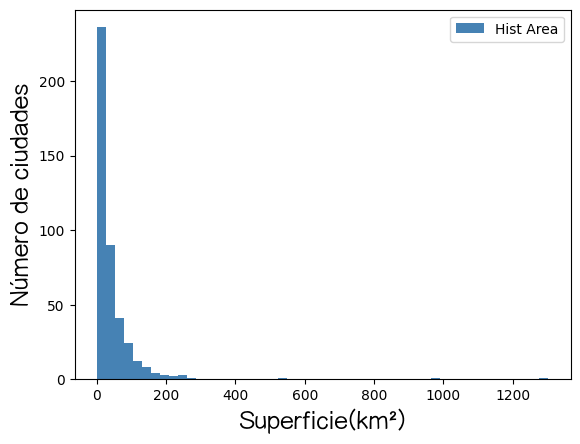

In [8]:
plt.hist(df["area_total_km2"],color = "steelblue", bins = 50, label= "Hist Area")
plt.legend()
plt.ylabel("Número de ciudades", font= "Yuppy SC", size = 18)
plt.xlabel("Superficie(km²)", font= "Yuppy SC", size = 18);
plt.show()

# 3. 
El scatter de área de agua de un ciudad con su poblacion.

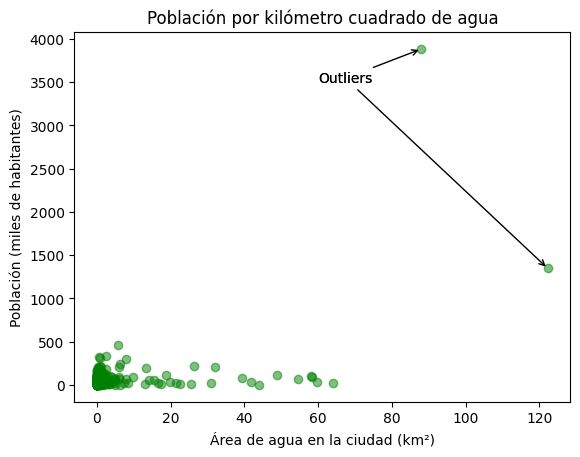

In [10]:
plt.scatter(df["area_water_km2"], df["population_total"]/1000, c= "green", alpha = 0.5)
plt.xlabel("Área de agua en la ciudad (km²)")
plt.ylabel("Población (miles de habitantes)")
plt.title("Población por kilómetro cuadrado de agua")


outlier_1_y = df.population_total.nlargest(2).iloc[0]
outlier_2_y = df.population_total.nlargest(2).iloc[1]
outlier_1_x = df.loc[df.population_total.nlargest(2).index, "area_water_km2"].values[0]
outlier_2_x = df.loc[df.population_total.nlargest(2).index, "area_water_km2"].values[1]

plt.annotate(xy =(outlier_1_x, outlier_1_y/1000), 
             xytext = (60,3500), 
             text = "Outliers",
             arrowprops= dict(arrowstyle = "->"))
plt.annotate(xy =(outlier_2_x, outlier_2_y/1000), 
             xytext = (60,3500), 
             text = "Outliers",
             arrowprops= dict(arrowstyle = "->"))
plt.show();

# 4. 
El boxplot de la altura de las ciudades.

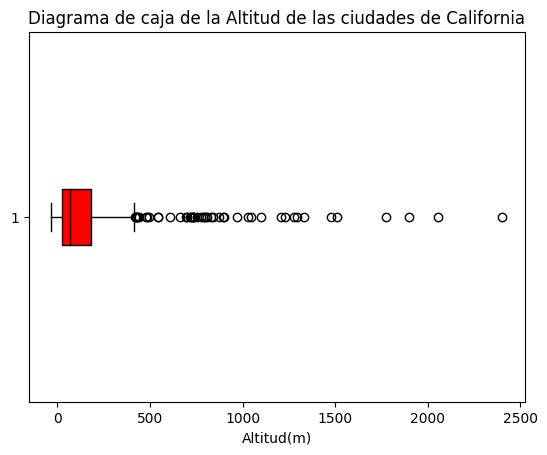

In [10]:
plt.boxplot(df["elevation_m"], whis = 1.5, vert = False, patch_artist=True, boxprops=dict(facecolor="red"), whiskerprops=dict(color="black"), medianprops=dict(color="black"));
plt.xlabel("Altitud(m)")
plt.title("Diagrama de caja de la Altitud de las ciudades de California");

### #1.3

Graba la figura en un archivo y sube el archivo a tu repo personal también.

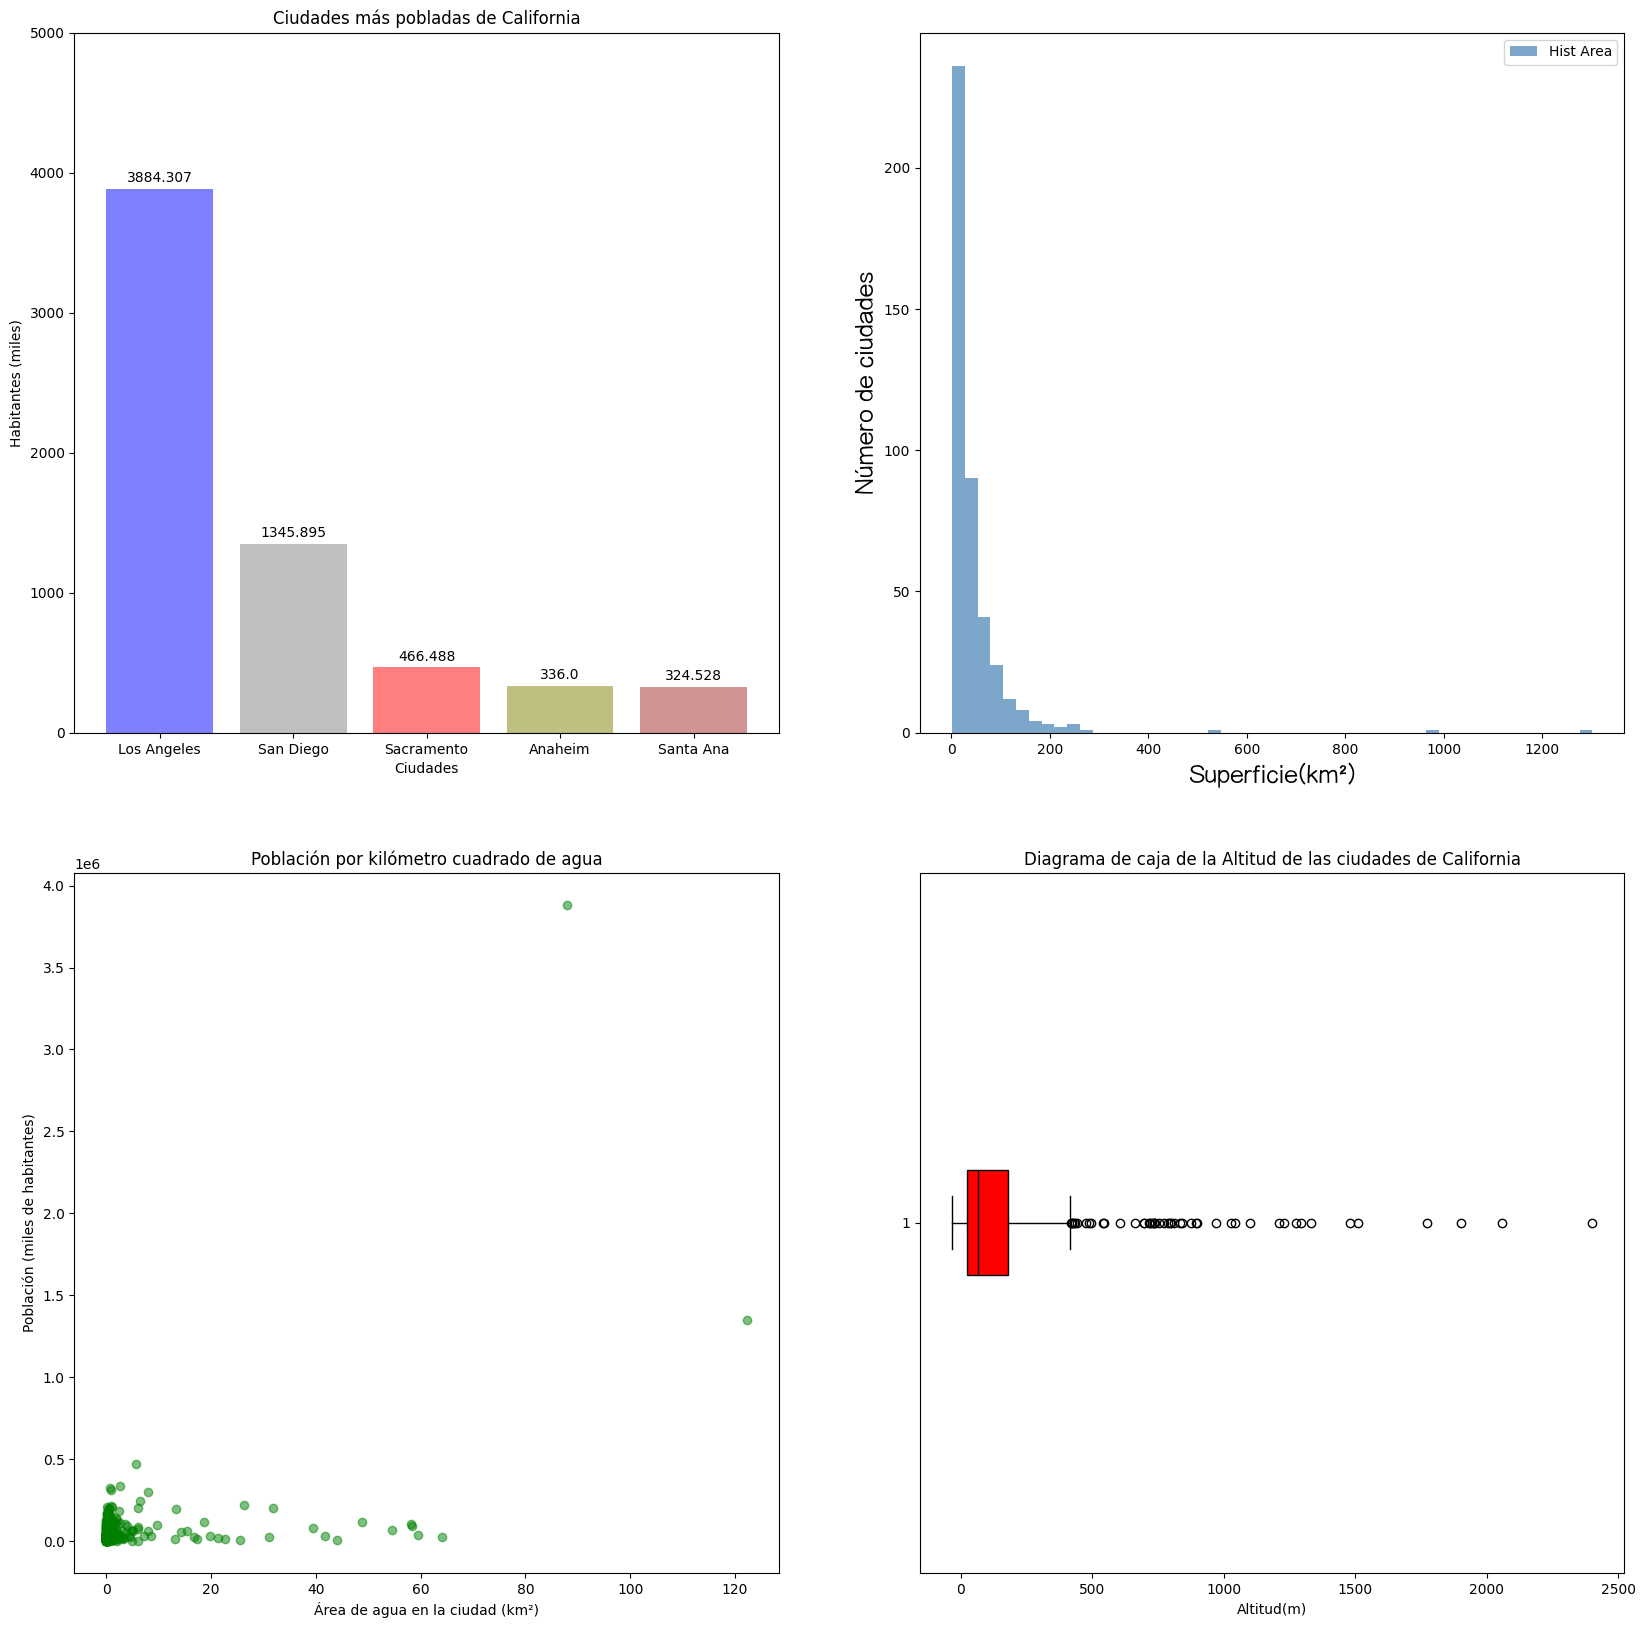

In [11]:
# Unir todas las figuras

fig, ax = plt.subplots (2,2, figsize = (20,20))

#primera grafica
city_pobladas = df.loc[df.population_total.nlargest(5).index, ["city","population_total"]]
modificadas = {"LosAngeles": "Los Angeles", "SanDiego": "San Diego", "SantaAna": "Santa Ana"}
ciudades = city_pobladas["city"].replace (modificadas).to_list()

ax[0,0].bar(x= ciudades, height= city_pobladas["population_total"]/1000, color = ("blue","gray","red","olive","brown"), alpha = 0.5)
ax[0,0].set_ylim([0,5000])
ax[0,0].set_ylabel("Habitantes (miles)")
ax[0,0].set_xlabel("Ciudades")

city_pobladas.set_index("city", inplace = True)
for indice, ciudad in enumerate(city_pobladas.index):
    poblacion = city_pobladas.loc[ciudad,"population_total"]/1000
    ax[0,0].text(ciudades[indice], poblacion + 50, f"{poblacion}", ha = "center")
    
ax[0,0].set_title("Ciudades más pobladas de California")

#segunda
ax[0,1].hist(df["area_total_km2"], color = "steelblue", bins = 50, label= "Hist Area", alpha = 0.7)
ax[0,1].legend()
ax[0,1].set_ylabel("Número de ciudades", font= "Yuppy SC", size = 18)
ax[0,1].set_xlabel("Superficie(km²)", font= "Yuppy SC", size = 18)

#tercera
ax[1,0].scatter (df["area_water_km2"], df["population_total"], c= "green", alpha = 0.5)
ax[1,0].set_ylabel("Población (miles de habitantes)")
ax[1,0].set_xlabel("Área de agua en la ciudad (km²)")
ax[1,0].set_title("Población por kilómetro cuadrado de agua")

#cuarta
ax[1,1].boxplot(df["elevation_m"],vert=False, patch_artist=True, boxprops=dict(facecolor="red"), whiskerprops=dict(color="black"), medianprops=dict(color="black"))
ax[1,1].set_xlabel("Altitud(m)")
ax[1,1].set_title("Diagrama de caja de la Altitud de las ciudades de California");

In [12]:
fig.savefig("./figuras_challenge.png")